In [2]:
import igraph
from matplotlib import pyplot as plt

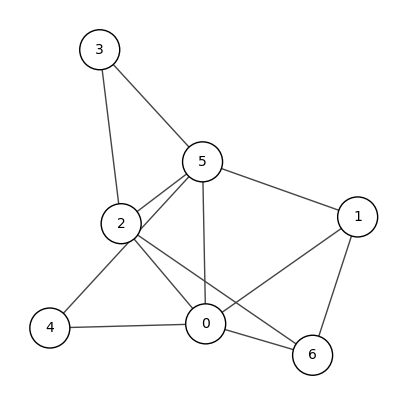

In [44]:
# g = igraph.Graph.Erdos_Renyi(n=7, m=12)
g = igraph.Graph.Read_Edgelist('graph_example.txt', directed=False)
fig, ax = plt.subplots(figsize=(5,5))
igraph.plot(
    g,
    bbox = (300,300),
    target=ax,
    # layout="graphopt",  # kamada_kawai
    vertex_label_color = 'black',
    vertex_label_size = 10,
    vertex_label = list(range(7)),
    vertex_size = 40,
    vertex_color = 'white',
    edge_arrow_width=7,
    edge_width=1,
    # edge_label=g.get_vertex_dataframe(),
    # edge_align_label=True,
    # edge_background='white'
)
plt.show()

In [45]:
def create_jaccard_index_map(g: igraph.Graph) -> dict:
    jaccard_index = dict()
    for vertex_a in g.vs:
        for vertex_b in g.vs:
            if vertex_a == vertex_b:
                continue
            neighbors_a = set(g.neighbors(vertex_a))
            neighbors_b = set(g.neighbors(vertex_b))
            intersection = neighbors_a & neighbors_b
            union = neighbors_a | neighbors_b
            jaccard_index[(vertex_a.index, vertex_b.index)] = (len(intersection) / len(union), len(intersection), len(union))
    return jaccard_index

create_jaccard_index_map(g)

{(0, 1): (0.3333333333333333, 2, 6),
 (0, 2): (0.2857142857142857, 2, 7),
 (0, 3): (0.4, 2, 5),
 (0, 4): (0.16666666666666666, 1, 6),
 (0, 5): (0.42857142857142855, 3, 7),
 (0, 6): (0.3333333333333333, 2, 6),
 (1, 0): (0.3333333333333333, 2, 6),
 (1, 2): (0.75, 3, 4),
 (1, 3): (0.25, 1, 4),
 (1, 4): (0.6666666666666666, 2, 3),
 (1, 5): (0.14285714285714285, 1, 7),
 (1, 6): (0.2, 1, 5),
 (2, 0): (0.2857142857142857, 2, 7),
 (2, 1): (0.75, 3, 4),
 (2, 3): (0.2, 1, 5),
 (2, 4): (0.5, 2, 4),
 (2, 5): (0.2857142857142857, 2, 7),
 (2, 6): (0.16666666666666666, 1, 6),
 (3, 0): (0.4, 2, 5),
 (3, 1): (0.25, 1, 4),
 (3, 2): (0.2, 1, 5),
 (3, 4): (0.3333333333333333, 1, 3),
 (3, 5): (0.16666666666666666, 1, 6),
 (3, 6): (0.25, 1, 4),
 (4, 0): (0.16666666666666666, 1, 6),
 (4, 1): (0.6666666666666666, 2, 3),
 (4, 2): (0.5, 2, 4),
 (4, 3): (0.3333333333333333, 1, 3),
 (4, 5): (0.16666666666666666, 1, 6),
 (4, 6): (0.25, 1, 4),
 (5, 0): (0.42857142857142855, 3, 7),
 (5, 1): (0.14285714285714285, 1, 

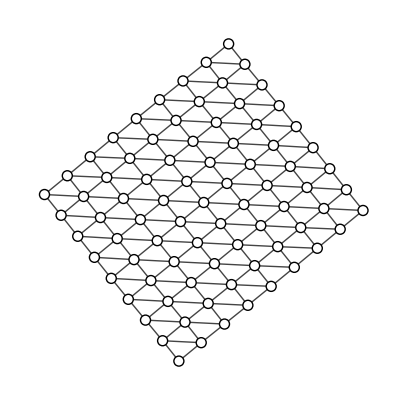

In [39]:
from igraph import Graph

def create_right_treeangle_sieve(n: int) -> Graph:
    # Создаем граф
    g = Graph()

    # Добавляем вершины
    num_vertices = n ** 2  # Общее количество вершин
    g.add_vertices(num_vertices)

    # Соединяем вершины внутри каждого треугольника
    for i in range(n):
        for j in range(n-1):
            g.add_edge(i*n+j, i*n+j+1)  # в строке

    for i in range(n-1):
        for j in range(n-1):
            g.add_edge(i*n+j, (i+1)*n+j+1)  # по диагонали вниз

    # Соединяем вершины соседних треугольников
    for i in range(n-1):
        for j in range(n):
            if (i+1)*n + j < num_vertices:
                g.add_edge(i*n+j, (i+1)*n+j)  # по вертикали
    return g

g = create_right_treeangle_sieve(9)
# Выводим граф
fig, ax = plt.subplots(figsize=(5,5))
igraph.plot(
    g,
    bbox = (300,300),
    target=ax,
    # layout="graphopt",  # kamada_kawai
    vertex_label_color = 'black',
    vertex_label_size = 10,
    vertex_size = 10,
    vertex_color = 'white',
    edge_arrow_width=7,
    edge_width=1,
    # edge_label=g.es["weight"],
    # edge_align_label=True,
    # edge_background='white'
)
plt.show()

In [40]:
from datetime import datetime


COUNT_OF_TESTS_PER_SIZE = 100
for size in range(5, 30):
    sieve = create_right_treeangle_sieve(size)
    start_time = datetime.now()
    for _ in range(COUNT_OF_TESTS_PER_SIZE):
        create_jaccard_index_map(sieve)
    end_time = datetime.now()
    runned_time = end_time - start_time
    print(size, runned_time.total_seconds())

5 0.160145
6 0.314285
7 0.580528
8 1.012919
9 1.624475
10 2.464237
11 3.621288
12 5.124655
13 7.27761
14 9.858955
15 13.070871


KeyboardInterrupt: 

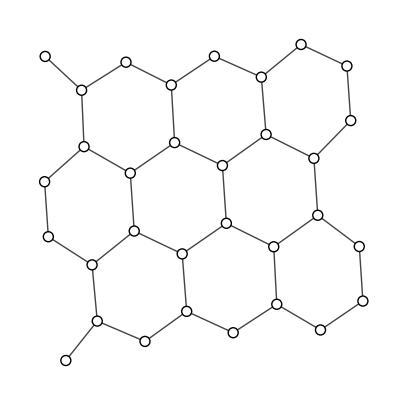

In [ ]:
from igraph import Graph

def create_right_hexagon_sieve(n: int) -> Graph:
    # Создаем граф
    g = Graph()

    # Добавляем вершины
    num_vertices = n ** 2  # Общее количество вершин
    g.add_vertices(num_vertices)

    # /\/\/\
    for i in range(0, n-1, 4):
        for j in range(1, n-1, 2):
            g.add_edge(i*n+j, (i+1)*n+j+1)  # по диагонали вниз вправо
        for j in range(1, n, 2):
            g.add_edge(i*n+j, (i+1)*n+j-1)  # по диагонали вниз влево

    # \/\/\/
    for i in range(2, n-1, 4):
        for j in range(0, n-1, 2):
            g.add_edge(i*n+j, (i+1)*n+j+1)  # по диагонали вниз вправо
        for j in range(2, n, 2):
            g.add_edge(i*n+j, (i+1)*n+j-1)  # по диагонали вниз влево

    # |_|_|_|_ 
    for i in range(1, n-1, 4):
        for j in range(0, n, 2):
            g.add_edge(i*n+j, (i+1)*n+j)  # по вертикали вниз

    # _|_|_|_|
    for i in range(3, n-1, 4):
        for j in range(1, n, 2):
            g.add_edge(i*n+j, (i+1)*n+j)  # по вертикали вниз

    # delete all vertexes without edges 
    g.vs.select(_degree=0).delete()
    return g

g = create_right_hexagon_sieve(8)
# Выводим граф
fig, ax = plt.subplots(figsize=(5,5))
igraph.plot(
    g,
    bbox = (300,300),
    target=ax,
    vertex_label_color = 'black',
    vertex_label_size = 10,
    vertex_size = 10,
    vertex_color = 'white',
    edge_arrow_width=7,
    edge_width=1,
)
plt.show()